#Q1

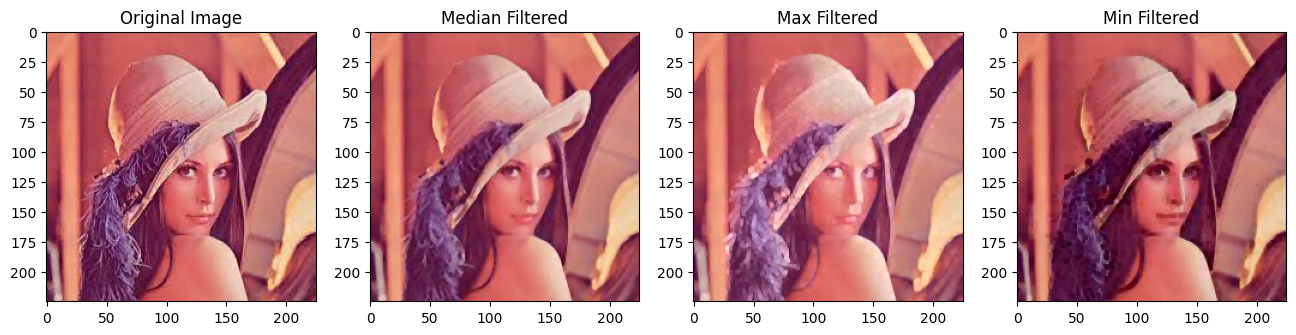

In [ ]:
import cv2
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Read the image
img_rgb = cv2.imread('image1.jpg')

# Convert NumPy array to PIL Image
img_pil = Image.fromarray(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

# Apply Median filter
median_filtered = img_pil.filter(ImageFilter.MedianFilter(size=3))

# Apply Max filter
max_filtered = img_pil.filter(ImageFilter.MaxFilter(size=3))

# Apply Min filter
min_filtered = img_pil.filter(ImageFilter.MinFilter(size=3))

# Display the original and filtered images
plt.figure(figsize=(16, 4))

plt.subplot(141)
plt.imshow(img_pil)
plt.title('Original Image')

plt.subplot(142)
plt.imshow(median_filtered)
plt.title('Median Filtered')

plt.subplot(143)
plt.imshow(max_filtered)
plt.title('Max Filtered')

plt.subplot(144)
plt.imshow(min_filtered)
plt.title('Min Filtered')

plt.show()


#Q2

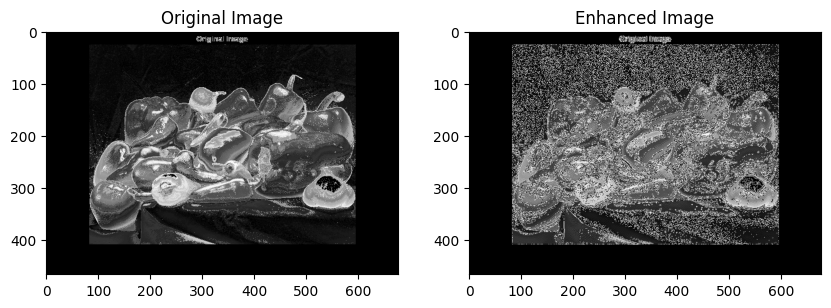

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

def laplacian_filter(image):
    original_image = Image.open(image)
    image_array = np.array(original_image)

    # Laplacian filter
    filtered_image = ndimage.laplace(image_array)

    # Enhance details by adding the filtered result to the original image
    enhanced_image = image_array + filtered_image

    return enhanced_image

image_path = 'image2.jpg'

# Apply the Laplacian filter
enhanced_image = laplacian_filter(image_path)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.array(Image.open(image_path)), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')

plt.show()


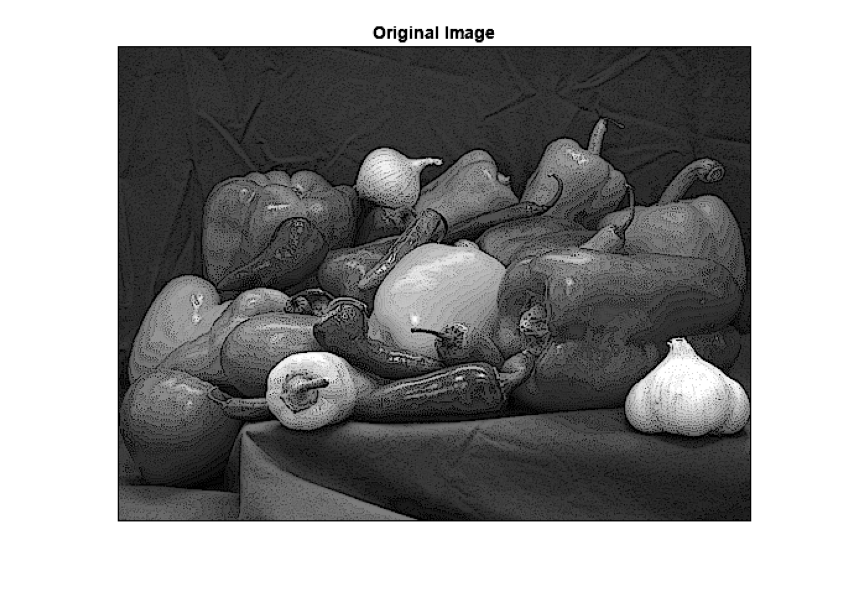

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# kernel
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])

Laplacian = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

a = -1
final = np.clip(img + a * Laplacian, 0, 255)

# Plot the Image
plt.figure(figsize=(8,5), dpi=150)
plt.imshow(final, cmap='gray')
plt.axis('off')
plt.show()


#Q3

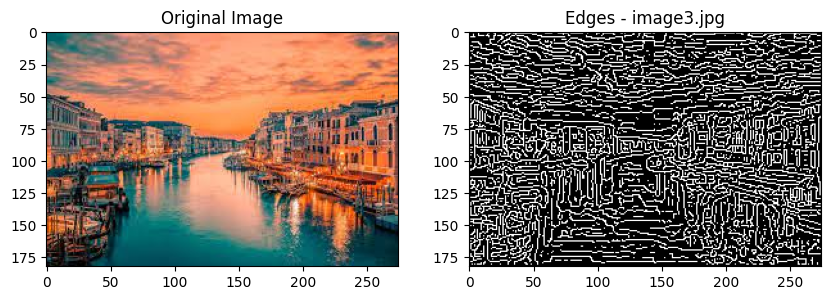

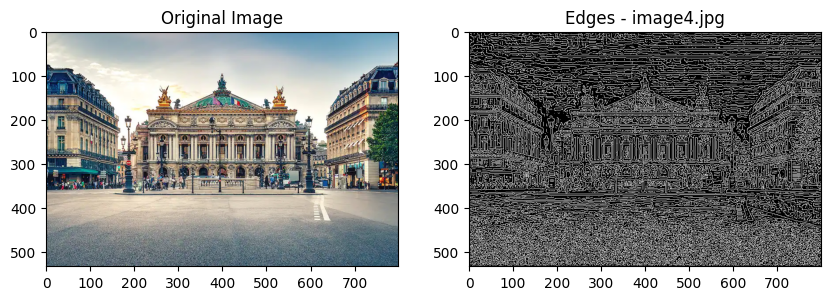

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import feature

def detect_edges(image):
    original_image = Image.open(image)
    image_array = np.array(original_image)

    if len(image_array.shape) == 3:
        image_array = np.mean(image_array, axis=-1)

    # Canny edge detector
    edges = feature.canny(image_array)

    return edges

def plot_images(image, edges, title):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title(title)

    plt.show()


image_3 = 'image3.jpg'
image_4 = 'image4.jpg'

# Detect edges for image3.jpg
edges_3 = detect_edges(image_3)
plot_images(np.array(Image.open(image_3)), edges_3, 'Edges - image3.jpg')

# Detect edges for image4.jpg
edges_4 = detect_edges(image_4)
plot_images(np.array(Image.open(image_4)), edges_4, 'Edges - image4.jpg')


#Q4
With average kernel 9*9, it has more smoothing because more values are present in the averaging. With kernel 3*3 and Gaussian, they are almost the same.

<ipython-input-8-23e1d3be6898>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kernel = np.ones((filter_size, filter_size), dtype=np.float) / (filter_size**2)


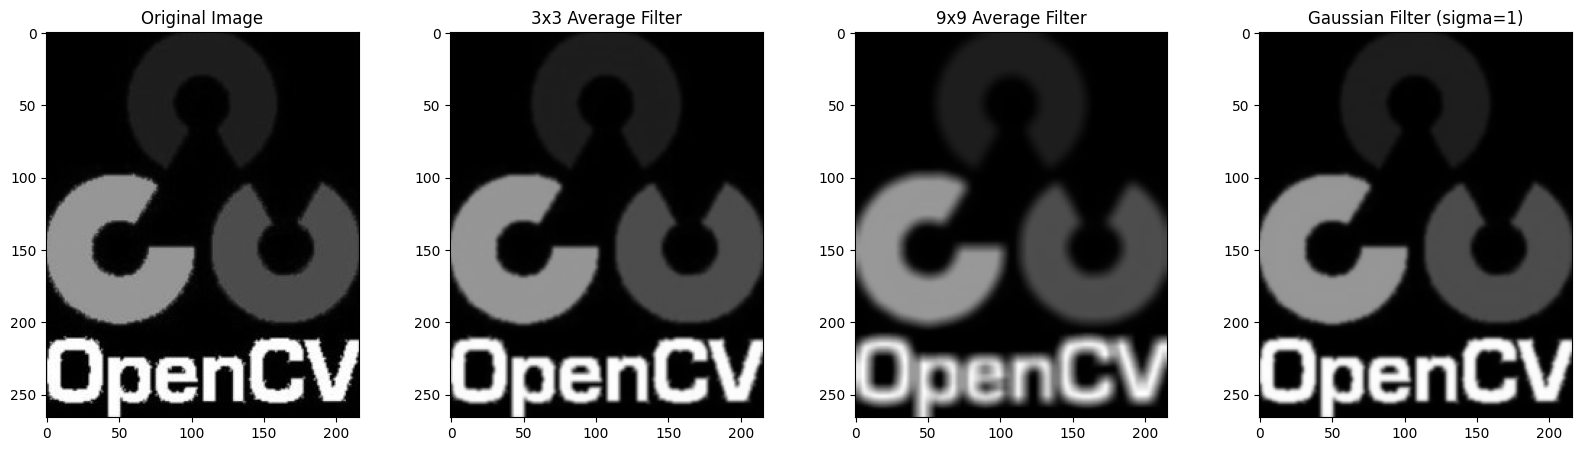

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter
from PIL import Image

def apply_average_filter(image_array, filter_size):
    kernel = np.ones((filter_size, filter_size), dtype=np.float) / (filter_size**2)
    return convolve(image_array, kernel)

def apply_gaussian_filter(image_array, sigma):
    return gaussian_filter(image_array, sigma=sigma)

def plot_comparison(original_image, filtered_image_1, filtered_image_2, filtered_image_3, title_1, title_2, title_3):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 4, 2)
    plt.imshow(filtered_image_1, cmap='gray')
    plt.title(title_1)

    plt.subplot(1, 4, 3)
    plt.imshow(filtered_image_2, cmap='gray')
    plt.title(title_2)

    plt.subplot(1, 4, 4)
    plt.imshow(filtered_image_3, cmap='gray')
    plt.title(title_3)

    plt.show()


image = 'image5.jpg'

original_image = Image.open(image).convert('L')
image_array = np.array(original_image)

# 3x3 average filter
filtered_image_3x3 = apply_average_filter(image_array, 3)

# 9x9 average filter
filtered_image_9x9 = apply_average_filter(image_array, 9)

# Gaussian filter with sigma=1
filtered_image_gaussian = apply_gaussian_filter(image_array, sigma=1)

plot_comparison(image_array, filtered_image_3x3, filtered_image_9x9, filtered_image_gaussian, '3x3 Average Filter', '9x9 Average Filter', 'Gaussian Filter (sigma=1)')


#Q5

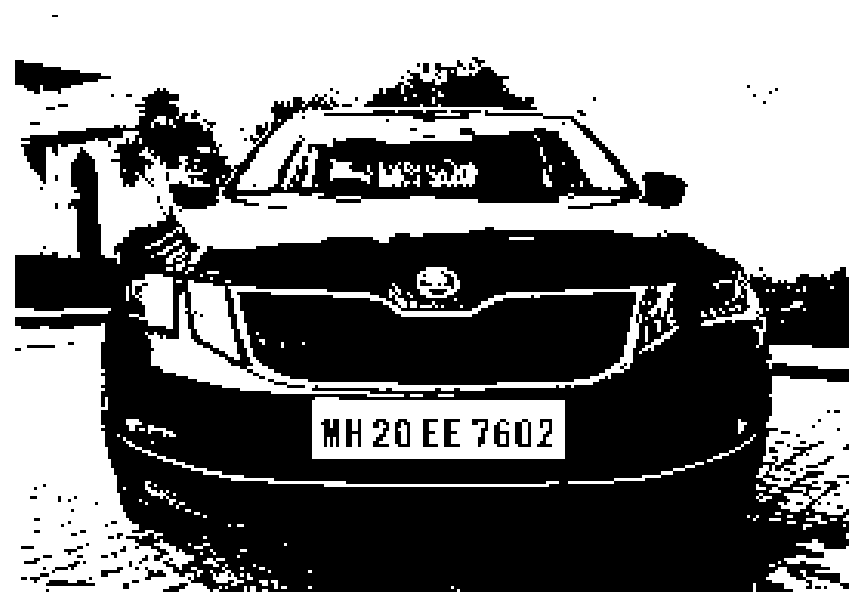

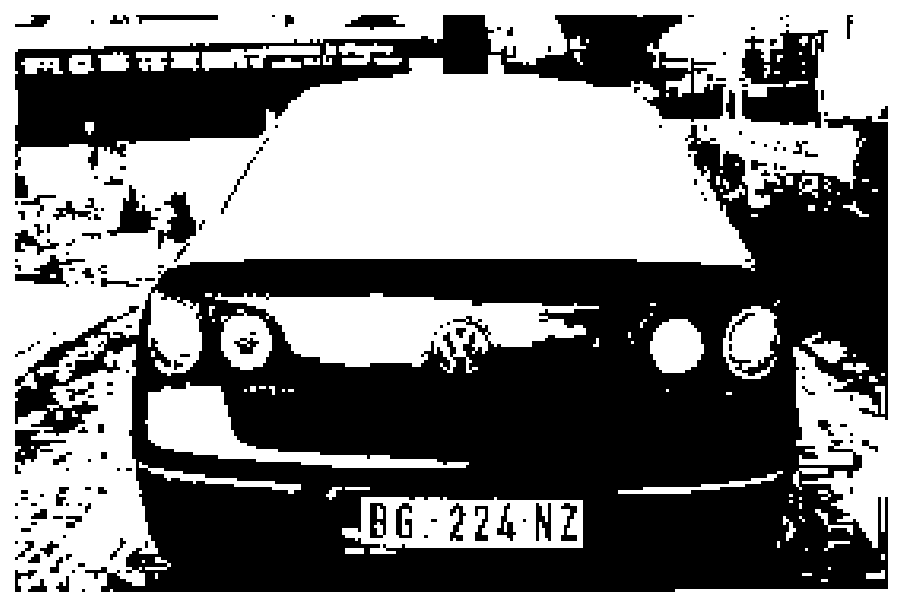

In [ ]:
import cv2

def recognize_license_plate(image_path):
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Enhance text
    _, threshold_img = cv2.threshold(gray_img, 100, 100, cv2.THRESH_BINARY)

    return threshold_img


image_path = 'image6.2.jpg'
recognized_plate = recognize_license_plate(image_path)

# Plot the Image
plt.figure(figsize=(8,5), dpi=150)
plt.imshow(recognized_plate, cmap='gray')
plt.axis('off')
plt.show()

image_path = 'image6.1.jpg'
recognized_plate = recognize_license_plate(image_path)

# Plot the Image
plt.figure(figsize=(8,5), dpi=150)
plt.imshow(recognized_plate, cmap='gray')
plt.axis('off')
plt.show()


#Q6

In [ ]:
#Clone stable master branch(recommended)

!git clone https://github.com/dream80/DeepFaceLab_Colab.git

#Pull updates from repository
!git pull


# Into DeepFaceLab_Colab
%cd /content/drive/My Drive/DeepFaceLab/DeepFaceLab_Colab

#Install requirements

!pip install -r requirements.txt
!pip install --upgrade scikit-image

Cloning into 'DeepFaceLab_Colab'...
remote: Enumerating objects: 4201, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 4201 (delta 5), reused 1 (delta 0), pack-reused 4187
Receiving objects: 100% (4201/4201), 787.50 MiB | 27.54 MiB/s, done.
Resolving deltas: 100% (2617/2617), done.
Updating files: 100% (440/440), done.
fatal: not a git repository (or any of the parent directories): .git
[Errno 2] No such file or directory: '/content/drive/My Drive/DeepFaceLab/DeepFaceLab_Colab'
/content
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
from deepface import DeepFace

f1 = "face1.jpg"
f2 = "face2.jpg"
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
result = DeepFace.verify(img1_path=f1, img2_path=f2, detector_backend=backends[1])

In [ ]:
!pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=b022423da852d06d30c1e53b374067e820c73b7af4a863a21c978fcd172d384e
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import cv2
import face_recognition
def find_face_encodings(image_path):
    # reading image
    image = cv2.imread(image_path)    # get face encodings from the image
    face_enc = face_recognition.face_encodings(image)    # return face encodings
    return face_enc[0]

# getting face encodings for first image
image_1 = find_face_encodings("face1.jpg")# getting face encodings for second image
image_2  = find_face_encodings("face2.jpg")

# checking both images are same
is_same = face_recognition.compare_faces([image_1], image_2)[0]
print(f"Is Same: {is_same}")

if is_same:
    # finding the distance level between images
    distance = face_recognition.face_distance([image_1], image_2)
    distance = round(distance[0] * 100)

    # calcuating accuracy level between images
    accuracy = 100 - round(distance)
    print("The images are same")
    print(f"Accuracy Level: {accuracy}%")
else:
    print("The images are not same")


#Q7
Considering that we have salt and pepper noise, the median filter is the best choice, but we also show other filters for comparison.(A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. )

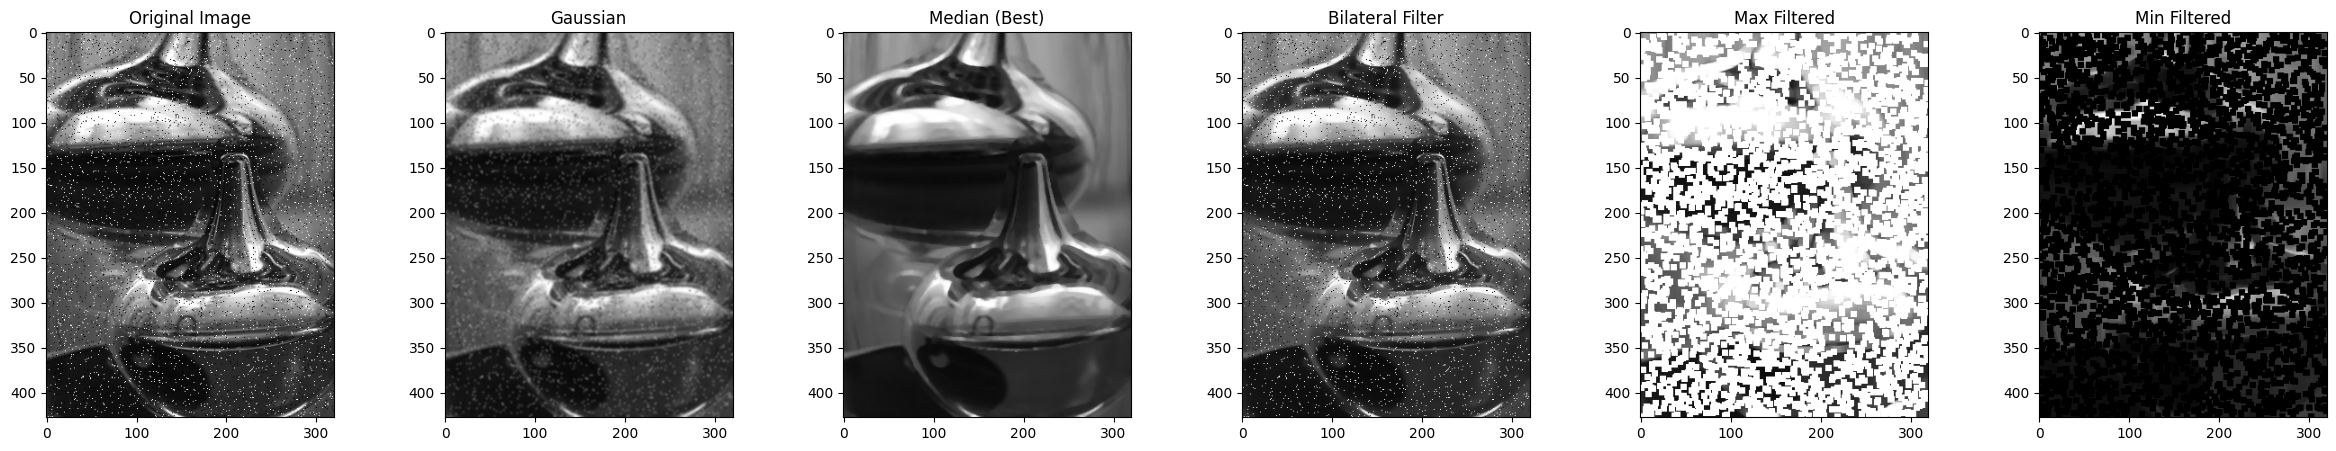

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image7.jpg')

# Apply Gaussian blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Apply median blur
median_blur = cv2.medianBlur(image, 5)

# Apply bilateral filter
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)

# Apply Max filter to compare
max_filtered = cv2.dilate(image, None, iterations=3)

# Apply Min filter to compare
min_filtered = cv2.erode(image, None, iterations=3)

plt.figure(figsize=(30, 5))

plt.subplot(161), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(162), plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)), plt.title('Gaussian')
plt.subplot(163), plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB)), plt.title('Median (Best)')
plt.subplot(164), plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB)), plt.title('Bilateral Filter')
plt.subplot(165), plt.imshow(max_filtered),plt.title('Max Filtered')
plt.subplot(166), plt.imshow(min_filtered), plt.title('Min Filtered')
plt.show()


#Q8

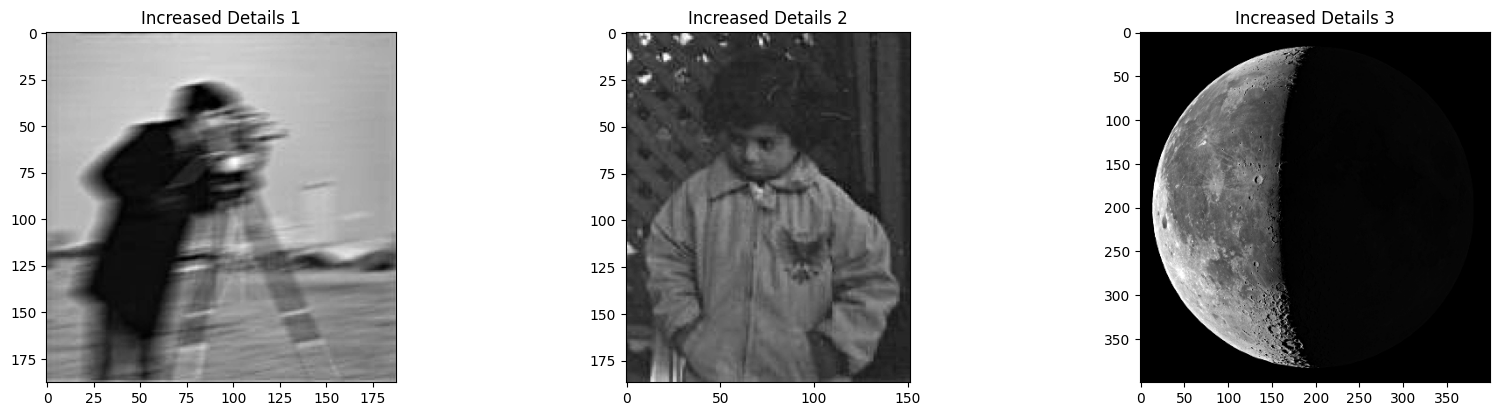

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def increase_details(image):

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (0, 0), 3)

    # Use the unsharp masking technique
    sharpened = cv2.addWeighted(gray, 1.5, blurred, -0.5, 0)

    # Stack the original and sharpened images horizontally
    #result = np.hstack([image, sharpened])

    return sharpened

# Load the images
image_paths = ['image8.1.jpg', 'image8.2.jpg', 'image8.3.jpg']
images = [cv2.imread(image_path) for image_path in image_paths]

# Process each image to increase details
processed_images = [increase_details(image) for image in images]

# Display the original and processed images using matplotlib
plt.figure(figsize=(20, 10))

for i in range(len(image_paths)):
    plt.subplot(2, len(image_paths), len(image_paths) + i + 1)
    plt.imshow(processed_images[i], cmap='gray')
    plt.title(f'Increased Details {i + 1}')

plt.show()


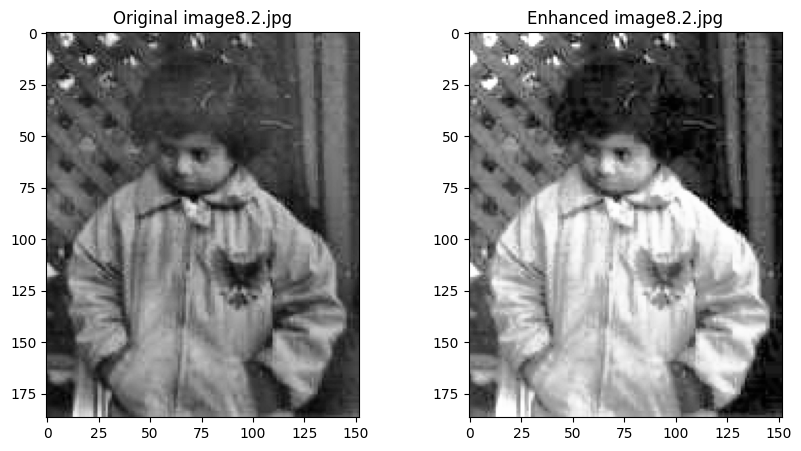

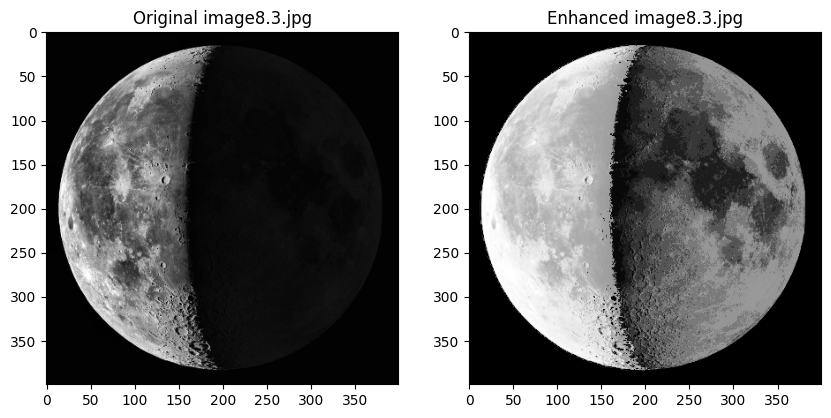

In [ ]:
import cv2
import matplotlib.pyplot as plt

def enhance_details(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply histogram equalization
    enhanced_img = cv2.equalizeHist(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)

    return cl1, enhanced_img

def plot_comparison(original_image, enhanced_image, title_original='Original Image', title_enhanced='Enhanced Image'):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(title_original)

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(title_enhanced)

    plt.show()

image_paths = ['image8.2.jpg', 'image8.3.jpg']

for image_path in image_paths:
    original_img, enhanced_img = enhance_details(image_path)
    plot_comparison(original_img, enhanced_img, f'Original {image_path}', f'Enhanced {image_path}')


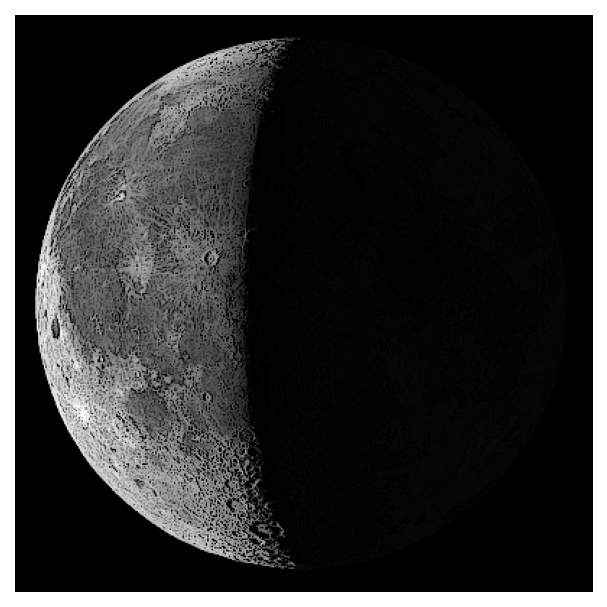

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image8.3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# kernel
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])

Laplacian = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

a = -1
final = np.clip(img + a * Laplacian, 0, 255)

# Plot the Image
plt.figure(figsize=(8,5), dpi=150)
plt.imshow(final, cmap='gray')
plt.axis('off')
plt.show()


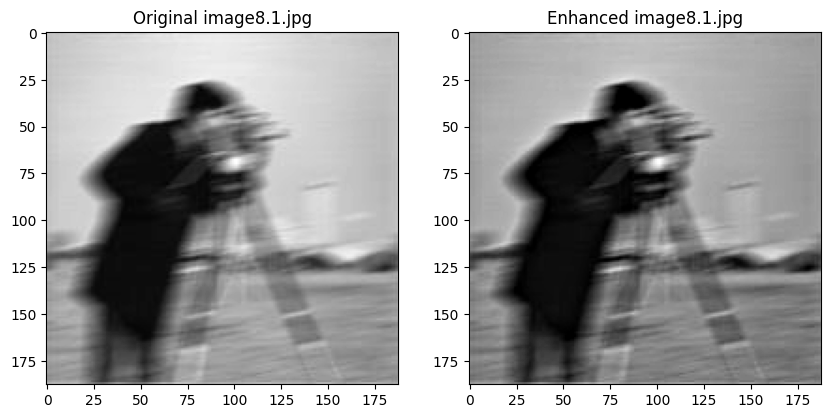

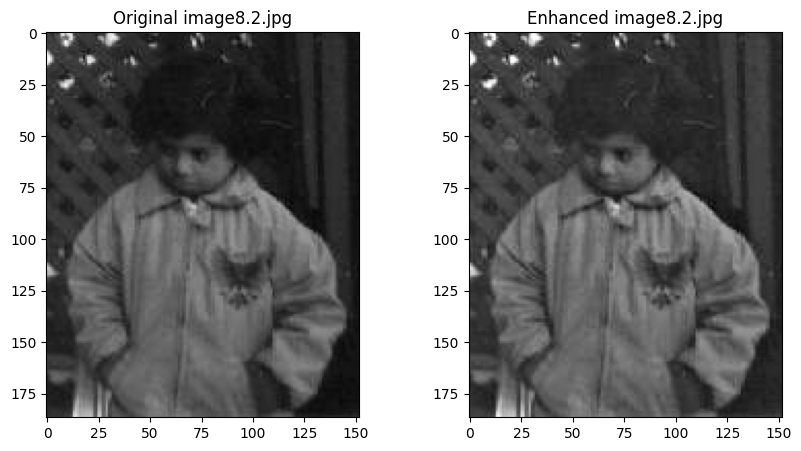

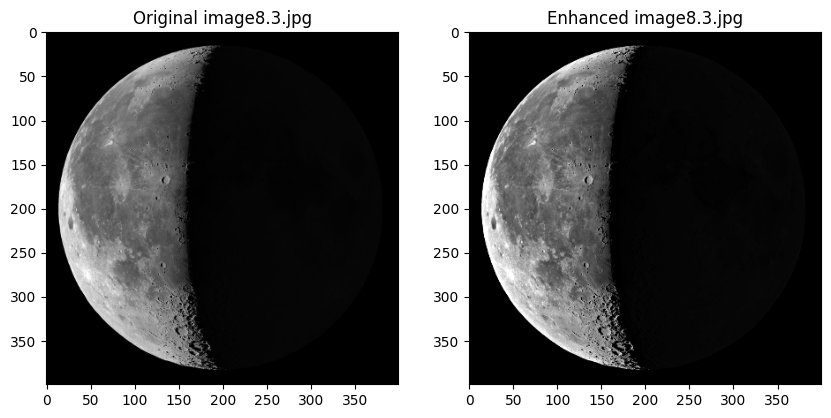

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_details(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to create a blurred version
    blurred_img = cv2.GaussianBlur(gray_img, (0, 0), 6)

    # Subtract the blurred image from the original to get the sharpened image
    sharpened_img = cv2.addWeighted(gray_img, 1.5, blurred_img, -0.5, 0)

    return gray_img, sharpened_img

def plot_comparison(original_image, enhanced_image, title_original='Original Image', title_enhanced='Enhanced Image'):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(title_original)

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(title_enhanced)

    plt.show()

# List of image paths
image_paths = ['image8.1.jpg', 'image8.2.jpg', 'image8.3.jpg']

for image_path in image_paths:
    original_img, enhanced_img = enhance_details(image_path)
    plot_comparison(original_img, enhanced_img, f'Original {image_path}', f'Enhanced {image_path}')
